<a href="https://colab.research.google.com/github/Mizoroki-Heck/LearnMLWorkshop/blob/main/knowledge_level/predict_student_s_knowledge_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
data_train = pd.read_excel('/content/sample_data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls', sheet_name='Training_Data')
data_test = pd.read_excel('/content/sample_data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls', sheet_name='Test_Data')

In [ ]:
data_train = data_train.drop(['Unnamed: 6', 'Unnamed: 7', 'Attribute Information:'], axis=1)
data_test = data_test.drop(['Unnamed: 6', 'Unnamed: 7', 'Attribute Information:'], axis=1)


STG (Степень исследования материалов целевого объекта).  
SCG (степень повторения пользователем материалов целевого объекта).  
STR (Степень изучения пользователем объектов, связанных с целевым объектом).  
LPR (выполнение экзамена пользователем по объектам, связанным с целевым объектом).  
PEG (экзаменационная эффективность пользователя по целевым объектам).  
UNS (Уровень знаний пользователя).  

In [ ]:
data_train.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

In [ ]:
data_train.isna().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

<ipython-input-63-2408bdef3c42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(), annot = True)


<Axes: >

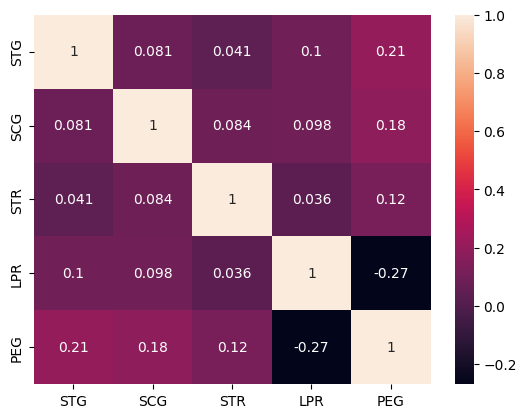

In [ ]:
sns.heatmap(data_train.corr(), annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
X = data_train.drop(' UNS', axis=1)
y = data_train[' UNS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
FC = RandomForestClassifier(n_estimators=100)
FC.fit(X_train, y_train)
predict = FC.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[19  0  0  0]
 [ 0 24  0  0]
 [ 0  2 22  0]
 [ 0  5  0  6]]


In [ ]:
class_report = classification_report(y_test, predict)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        19
         Low       0.77      1.00      0.87        24
      Middle       1.00      0.92      0.96        24
    very_low       1.00      0.55      0.71        11

    accuracy                           0.91        78
   macro avg       0.94      0.87      0.88        78
weighted avg       0.93      0.91      0.91        78

